In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [34]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

## Sex 칼럼 문자 => 라벨 인코딩 

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts().sort_index()

Sex
0    1307
1    1342
2    1528
Name: count, dtype: int64

Text(0.5, 1.0, 'Label')

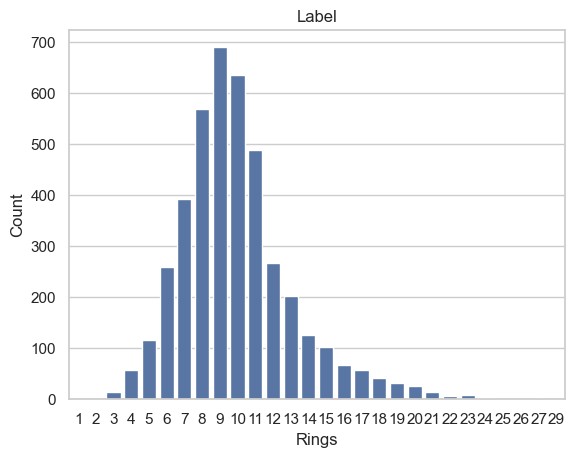

In [36]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [37]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

# 레이블 범주화하기 

In [38]:
import pandas as pd

df_c = df

bins = [0,5,10,30]  # 구간 설정
labels = [0,1,2]
df_c['Rings'] = pd.cut(df_c['Rings'], bins=bins, labels=labels).astype(int)

In [39]:
df['Rings'].value_counts().sort_index()

Rings
0     189
1    2541
2    1447
Name: count, dtype: int64

## 결측치 확인

In [40]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [41]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 컬럼별 히스토그램 확인

C:\Users\tansy\AppData\Local\Temp\ipykernel_19656\798274174.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
C:\Users\tansy\AppData\Local\Temp\ipykernel_19656\798274174.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Diameter'],

<Axes: xlabel='Diameter', ylabel='Density'>

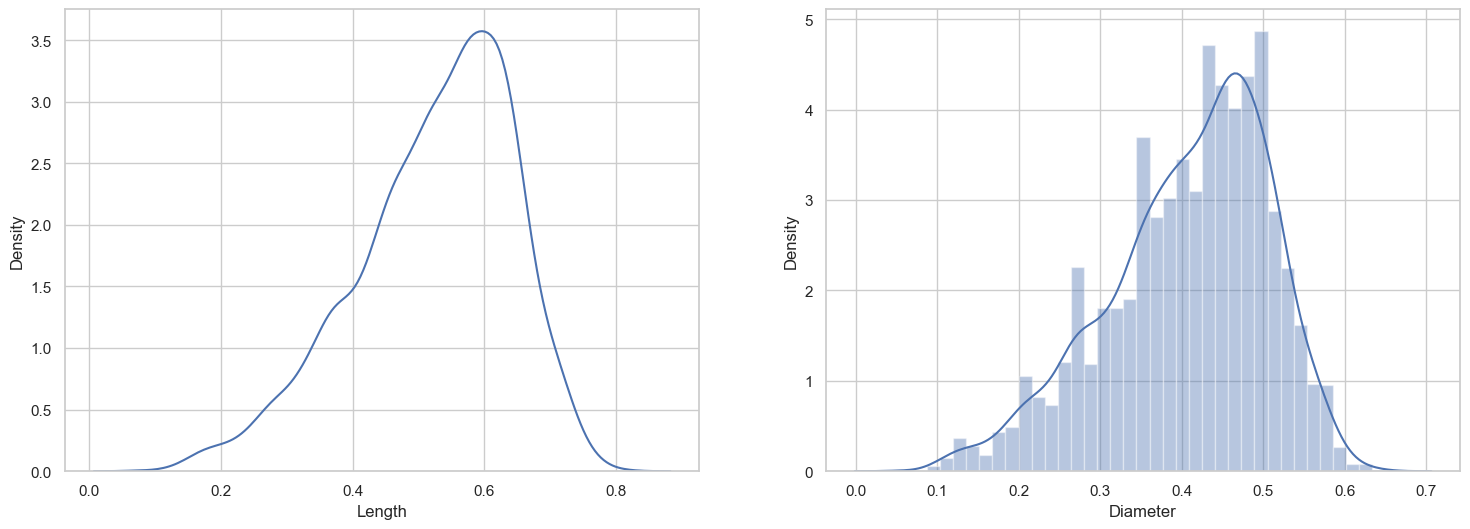

In [42]:
# 1. 두 변수간 상관관계를 파악 
# BloodPressure와 Glucose 열을 선택 

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

## 산점도 변수 간 상관관계 살펴보기

Text(0, 0.5, 'Diameter')

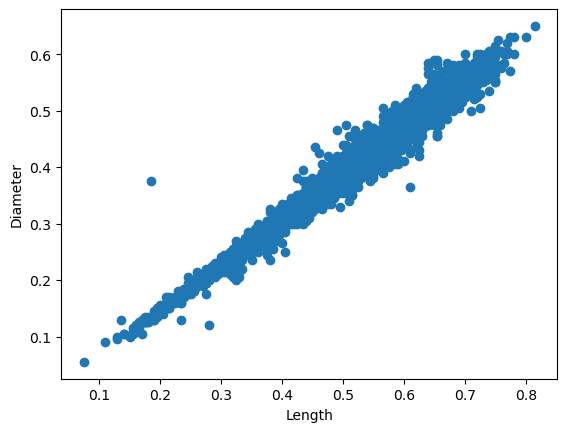

In [16]:
# 두 변수 간 산점도 
plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

## 모든 변수 간 상관관계 살펴보기 with pairplot 

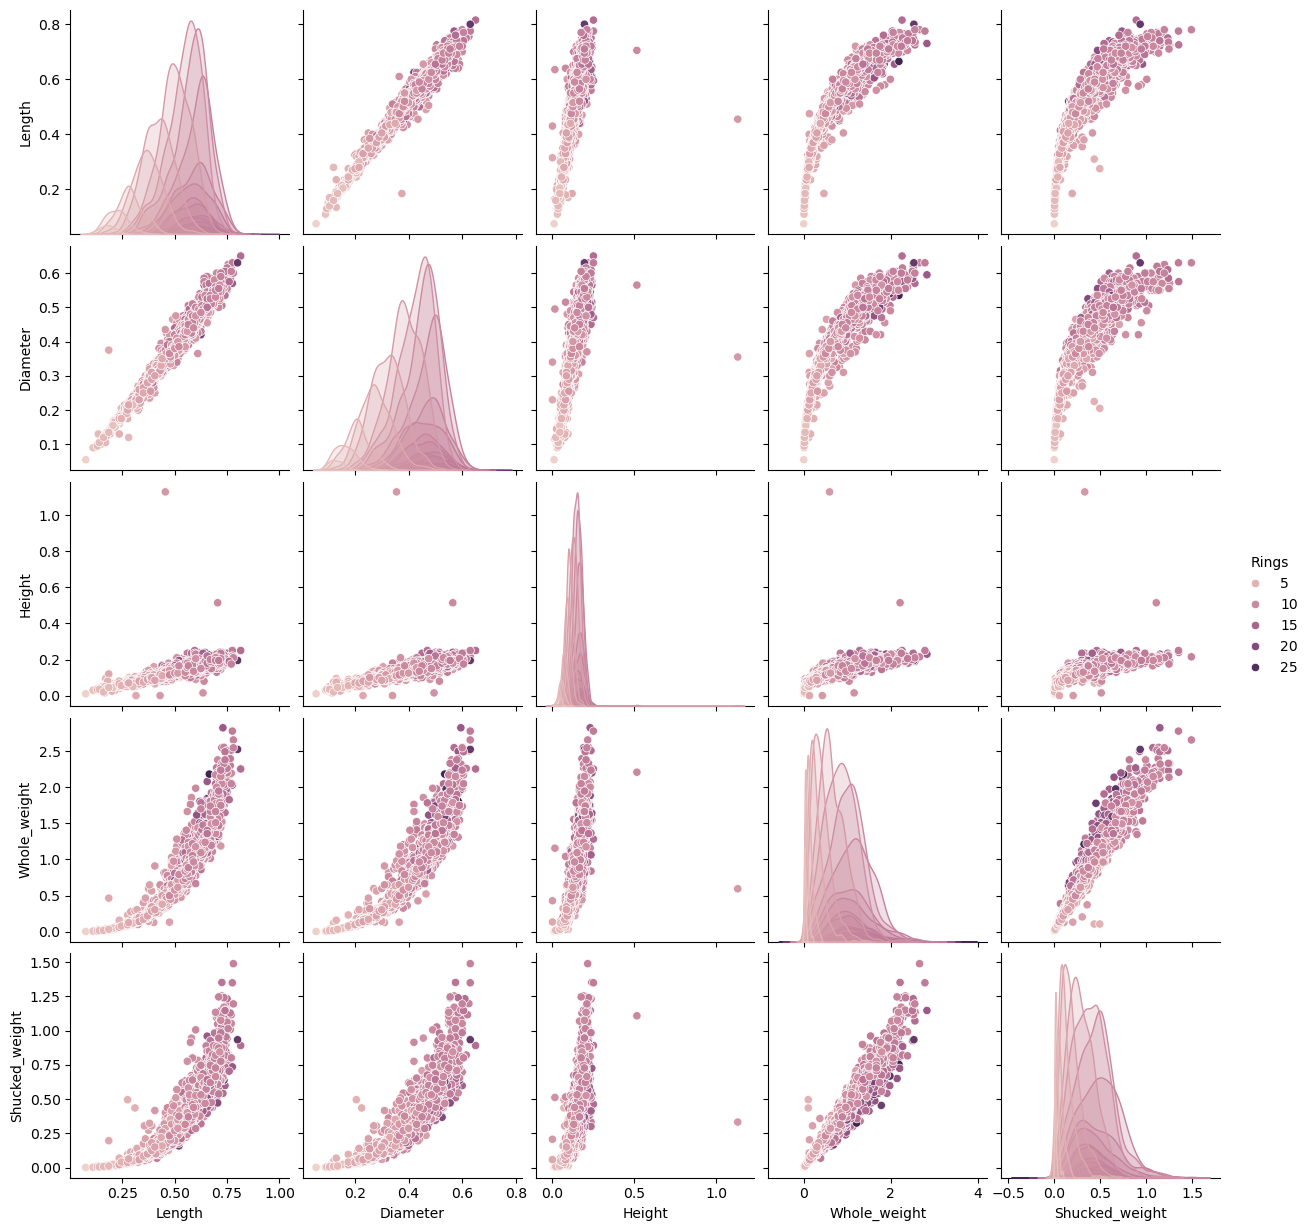

In [17]:
sns.pairplot(df, vars=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight'], hue='Rings')

C:\Users\tansy\AppData\Local\Temp\ipykernel_19656\1534378602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df,palette="Set3") # palette="Set3" : 색상 설정


Text(0.5, 1.0, 'Length')

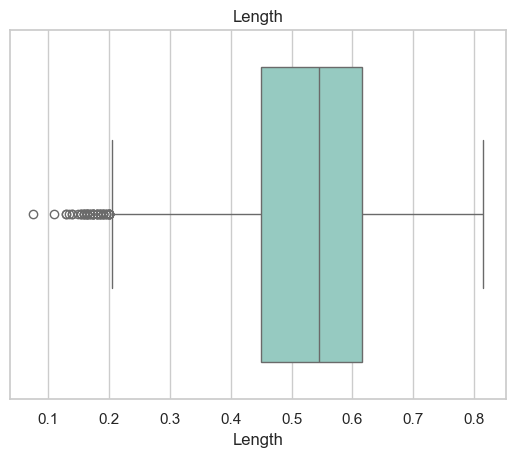

In [18]:
# 특정 칼럼의 범위 확인 및 outlier(이상치) 확인 

sns.set_theme(style="whitegrid") # 격자(세로선) 설정 
sns.boxplot(x="Length", data=df,palette="Set3") # palette="Set3" : 색상 설정 
plt.title("Length")

# 이상치 제거 

In [49]:
df = df[df['Length'] > 0.2 ]
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1


## 각 컬럼별 히스토그램 확인 

C:\Users\tansy\AppData\Local\Temp\ipykernel_19656\1463998332.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


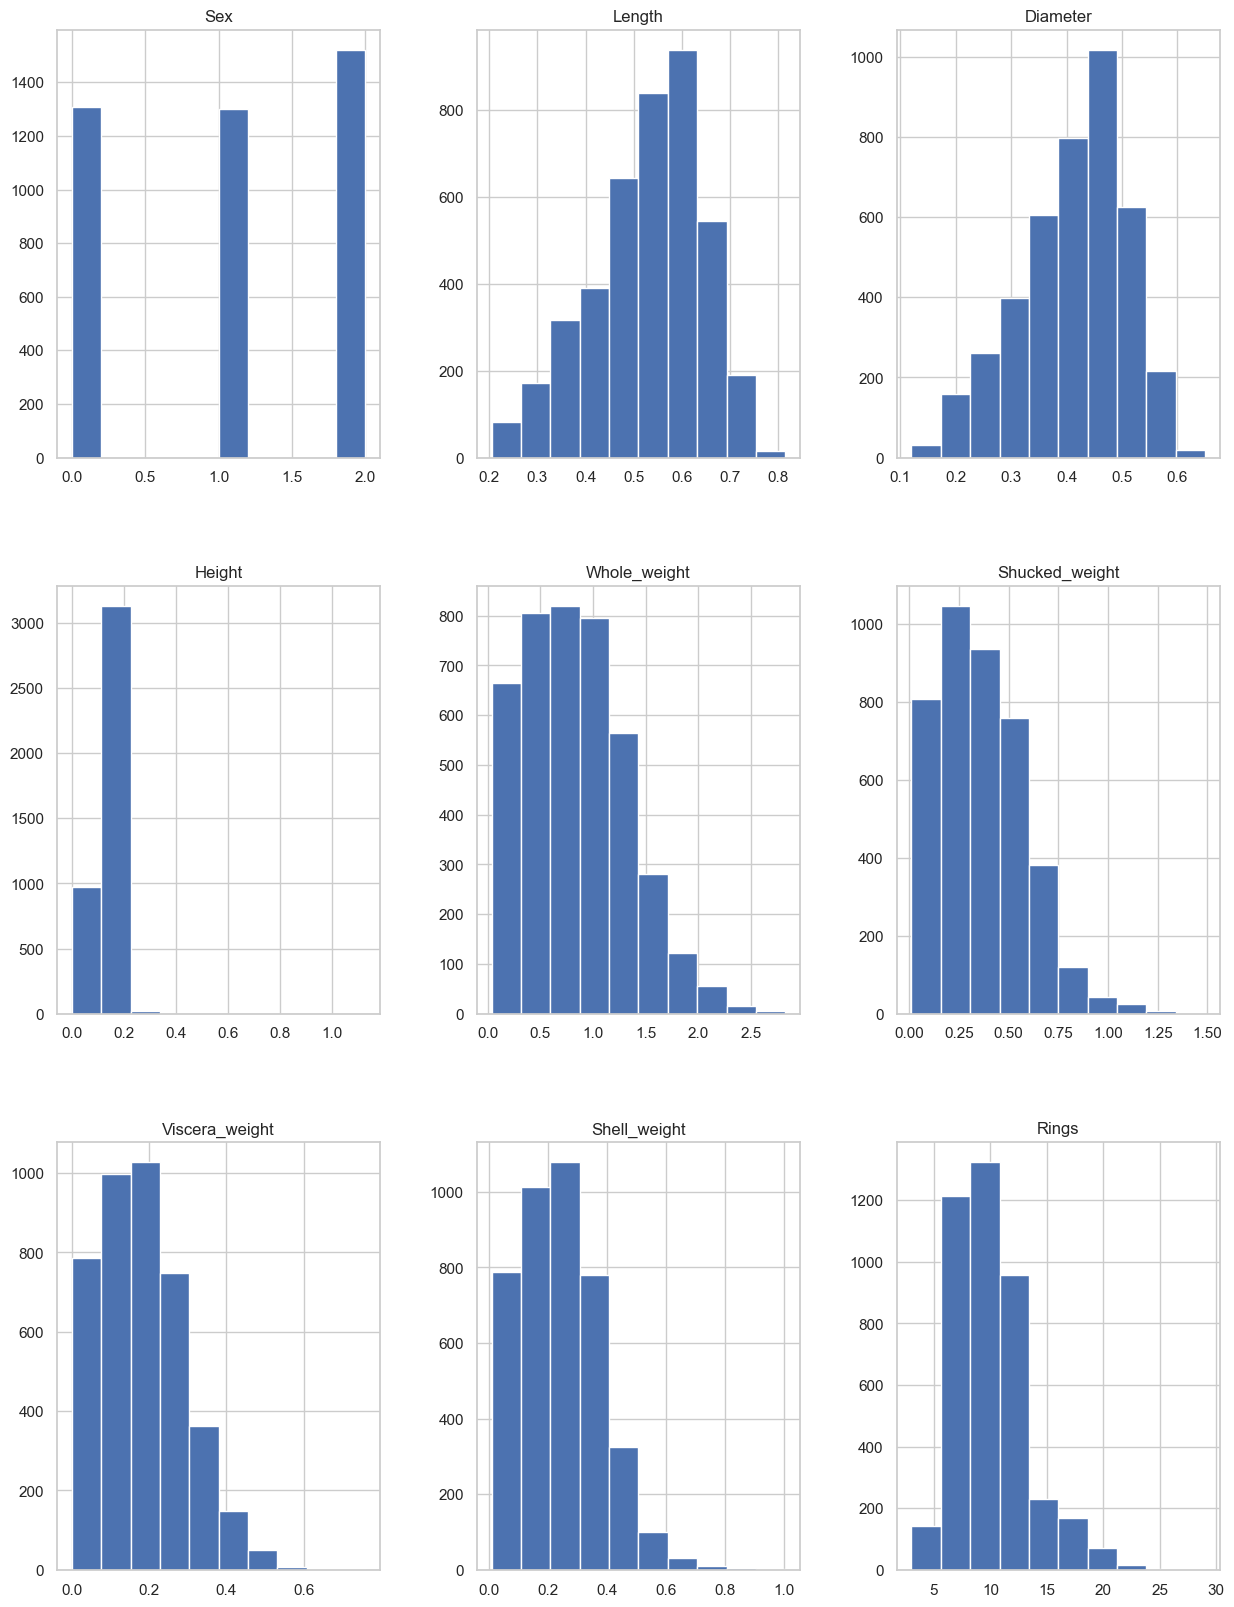

In [21]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca() 
df.hist(ax = ax)
plt.show()

## 데이터 준비

In [57]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [64]:
y = df.Rings
y.value_counts().sort_index()

Rings
0     143
1    2538
2    1447
Name: count, dtype: int64

## 머신러닝 5가지 분류 수행

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 1. SVM

In [69]:
clf_svm = SVC(random_state=0) 
clf_svm.fit(X_train, y_train) # 모델 훈련 

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7306201550387597
[[  0  26   0]
 [  0 572  61]
 [  0 191 182]]


## 2. 로지스틱 회귀(Logistic Regression)

In [70]:
clf_lr = LogisticRegression(random_state=0) 
clf_lr.fit(X_train, y_train) 

pred_lr = clf_lr.predict(X_test) # 예측값 

print ("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr)) 
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7441860465116279
[[ 10  16   0]
 [  5 556  72]
 [  0 171 202]]


## 3. 다층 퍼셉트론(MLP)

In [ ]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print("\n--- Neural Network Classifier ---") 
print(accuracy_score(y_test, pred_nn)) 
print(confusion_matrix(y_test, pred_nn)) 